<a href="https://colab.research.google.com/github/Greeense/demo/blob/main/6%EA%B8%B0_ASSO%EB%8C%80%EB%B9%84_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%97%AC%EB%B6%80(%EA%B3%BC%EC%A0%9C2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
path = "C:/Users/User/project5/churn_data.csv"
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
drop_col = ['customerID']
df1 = df.drop(columns=drop_col, axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharges의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df1['TotalCharges'].dtype)
df1.loc[df1['TotalCharges']==' '] = '0'
df2 = df1.astype({'TotalCharges':'float64'})
df2.head()

object


C:\Users\User\AppData\Local\Temp\ipykernel_18732\447219901.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['TotalCharges']==' '] = '0'
C:\Users\User\AppData\Local\Temp\ipykernel_18732\447219901.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['TotalCharges']==' '] = '0'
C:\Users\User\AppData\Local\Temp\ipykernel_18732\447219901.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['TotalCharges']==' '] = '0'


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


### 6. df2에서 Churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 df2를 df3에 저장하세요.
### df2의 Churn 컬럼의 Yes, No를 각각 1, 0으로 변환한 후 df3의 Churn 컬럼에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
display(df2['Churn'].value_counts())
df2['Churn'] = df2['Churn'].map({
    "Yes" : 1,
    "No" : 0
})
df3 = df2
df3.head()

Churn
No     5163
Yes    1869
0        11
Name: count, dtype: int64

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,0.0
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0.0
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1.0


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* df3을 df4에 저장하세요.
* df4의 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* df4의 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df4 = df3
for col in df4.columns:
    ratio = df4[col].isnull().sum() / len(df3)
    if ratio >= 0.4:
        df4.drop(columns=col, axis=1,inplace=True)

#40%미만 칼럼의 결측치있는 row 모두 삭제 => 전체중 결측치 있는 row 삭제
df4 = df4.dropna()

In [ ]:
#df4.isnull().mean()

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요.
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

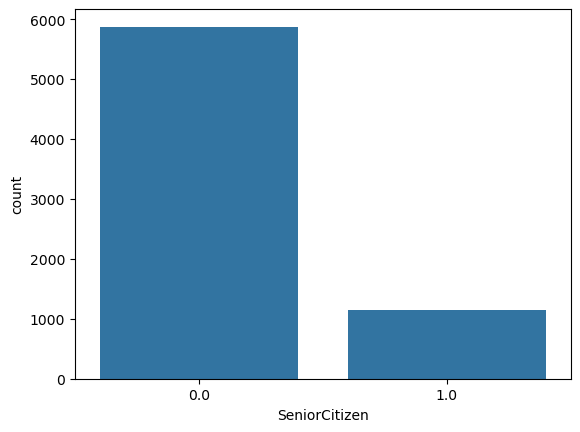

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0.0
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1.0
5,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1.0


In [ ]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt
import seaborn as sns

t = df4['SeniorCitizen'].value_counts()
sns.barplot(t)
plt.show()

df4.drop(columns='SeniorCitizen',axis=1)
df4.head()

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

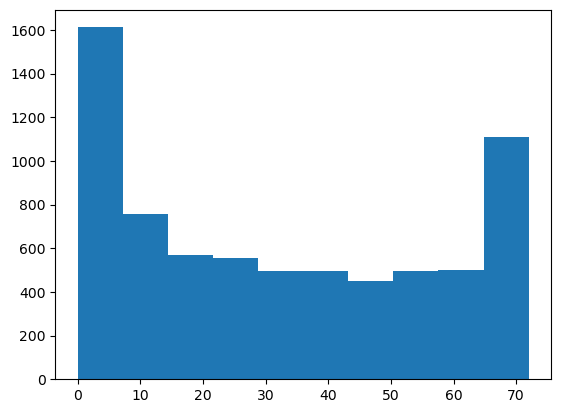

C:\Users\User\AppData\Local\Temp\ipykernel_18732\2916961583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tenure'] = df4['tenure'].astype('float')


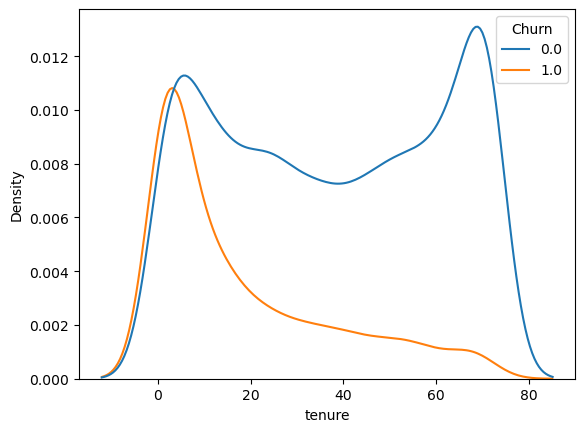

서비스 사용기간이 길어질 수록 이탈이 적다  O


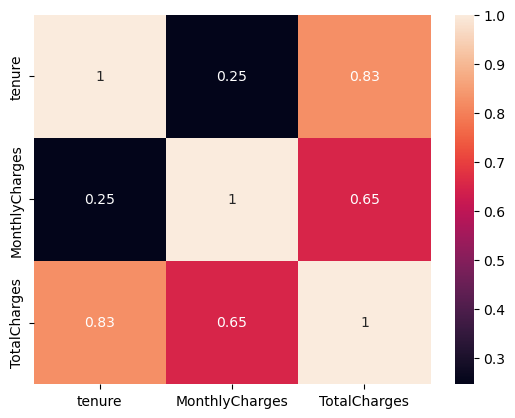

가장 높은 상관계수 0.83


In [ ]:
# 여기에 답안코드를 작성하세요.
plt.hist(df.tenure)
plt.show()
df4['tenure'] = df4['tenure'].astype('float')
sns.kdeplot(x='tenure', data=df4, hue='Churn')
plt.show()
print("서비스 사용기간이 길어질 수록 이탈이 적다 ","O")
sns.heatmap(
    df4[['tenure','MonthlyCharges','TotalCharges']].corr()
    ,annot=True)
plt.show()
print("가장 높은 상관계수 0.83")

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [ ]:
df4.dtypes[df4.dtypes=="object"].index

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

In [ ]:
df4.select_dtypes(include='object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

In [ ]:
# 여기에 답안코드를 작성하세요.
# df4.dtypes[df4.dtypes=="object"].index
"""
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')
"""
object_cols = []
for col in df4.columns:
    if df4[col].dtype == 'O':
        object_cols.append(col)

df5 = pd.get_dummies(df4, columns = object_cols, drop_first = True)

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split
target = 'Churn'

x = df5.drop(columns=target)
y = df5.loc[:,target]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2,random_state=42, stratify=y)

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요.
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model_logi = LogisticRegression()
model_logi.fit(x_train, y_train)
model_logi.score(x_valid, y_valid)

0.7799145299145299

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
model_knn.score(x_valid, y_valid)

0.7592592592592593

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth = 10, random_state=42)
model_tree.fit(x_train, y_train)
model_tree.score(x_valid, y_valid)

0.7813390313390314

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import RandomForestClassifier

model_rand = RandomForestClassifier(
    n_estimators=3,
    random_state=42
)
model_rand.fit(x_train, y_train)
model_rand.score(x_valid, y_valid)

0.7535612535612536

In [ ]:
# 여기에 답안코드를 작성하세요.
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=3, random_state=42)
model_xgb.fit(x_train, y_train)
model_xgb.score(x_valid, y_valid)

0.792022792022792

In [ ]:
# 여기에 답안코드를 작성하세요.
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier(n_estimators=3, random_state=42)
model_lgb.fit(x_train, y_train)
model_lgb.score(x_valid, y_valid)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 5612, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266037 -> initscore=-1.014823
[LightGBM] [Info] Start training from score -1.014823


0.7343304843304843

### 14. 바로 위 Light GBM 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

[[1031    0]
 [ 373    0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1031
         1.0       0.00      0.00      0.00       373

    accuracy                           0.73      1404
   macro avg       0.37      0.50      0.42      1404
weighted avg       0.54      0.73      0.62      1404



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


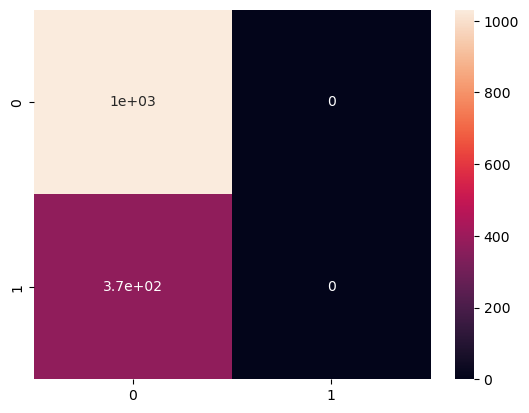

In [ ]:
# 여기에 답안코드를 작성하세요.
y_pred_lgb = model_lgb.predict(x_valid)
result = confusion_matrix(y_valid, y_pred_lgb)
print(result)
sns.heatmap(result, annot=True)
print(classification_report(y_valid, y_pred_lgb))

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.
n = x_train.shape[1]

model = Sequential()
model.add(Input(shape=(n,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),batch_size=16, epochs=30)

Epoch 1/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7459 - loss: 0.5059 - val_accuracy: 0.7856 - val_loss: 0.4560
Epoch 2/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8035 - loss: 0.4221 - val_accuracy: 0.7877 - val_loss: 0.4578
Epoch 3/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8202 - loss: 0.3919 - val_accuracy: 0.7849 - val_loss: 0.4778
Epoch 4/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8420 - loss: 0.3566 - val_accuracy: 0.7635 - val_loss: 0.5090
Epoch 5/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8553 - loss: 0.3270 - val_accuracy: 0.7614 - val_loss: 0.5530
Epoch 6/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8681 - loss: 0.3006 - val_accuracy: 0.7585 - val_loss: 0.5960
Epoch 7/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8825 - loss: 0.2749 - val_accuracy: 0.7564 - val_loss: 0.6694
Epoch 8/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8923 - loss: 0.2506 - val_accuracy: 0.

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

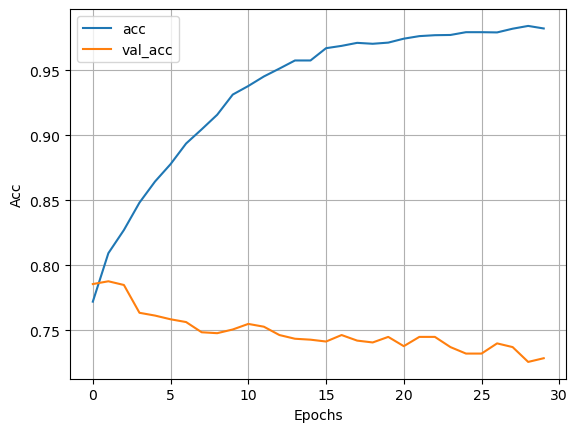

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.title='Accuracy'
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict(x_valid)
accuracy_score(y_valid,y_pred.argmax(axis=1))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.7343304843304843

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.

In [ ]:
# churn 데이터 불균형으로 인해 성능이 75정도밖에 되지 않음
# 언더샘플링, 오버샘플링을 통해 성능을 92까지 올릴 수 있다

